# Weather hwk - three observable trends
1. Temperature is highest closer to the equator 
2. Temperature and latitude has a negative correlation in the Northern hemistpher, but a postive correlation in the Southern hemisphere. 
3. When looking at cloudiness in cities worldwide, there doesn't seem to be any correlation between cloudiness and latitude

In [ ]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [6]:
# set up lists to hold reponse info
cityname = []
lat = []
lng = []
temp = []
humidity = []
clouds = []
wind = []
date = []
country = []
setcount = 0 
cityrecord = 0


# Loop through the list of cities and perform a request for data on each

for city in cities:
   
    # Build partial query URL
    query_url = f"{url}appid={weather_api_key}&units={units}&q=" 
    # Log the url, record, and set numbers
    print("Processing Record %s of | %s" % (cityrecord, city))
    cityrecord += 1 
    
    try:
    
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        clouds.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        cityname.append(response["name"])
    except:
        print("City not found. Skipping...")
        pass

Processing Record 0 of | ushuaia
Processing Record 1 of | general roca
Processing Record 2 of | faanui
Processing Record 3 of | rikitea
Processing Record 4 of | jamestown
Processing Record 5 of | sembe
Processing Record 6 of | husavik
Processing Record 7 of | skagastrond
City not found. Skipping...
Processing Record 8 of | puerto ayora
Processing Record 9 of | samalaeulu
City not found. Skipping...
Processing Record 10 of | hermanus
Processing Record 11 of | port alfred
Processing Record 12 of | karratha
Processing Record 13 of | snezhnogorsk
Processing Record 14 of | mar del plata
Processing Record 15 of | pechenga
Processing Record 16 of | busselton
Processing Record 17 of | san patricio
Processing Record 18 of | severo-kurilsk
Processing Record 19 of | dikson
Processing Record 20 of | cape town
Processing Record 21 of | catalina foothills
Processing Record 22 of | ribeira grande
Processing Record 23 of | ketchikan
Processing Record 24 of | saskylakh
Processing Record 25 of | katsuur

Processing Record 215 of | egvekinot
Processing Record 216 of | dunedin
Processing Record 217 of | okhotsk
Processing Record 218 of | soyo
Processing Record 219 of | bodden town
Processing Record 220 of | sinop
Processing Record 221 of | sitka
Processing Record 222 of | deputatskiy
Processing Record 223 of | labutta
City not found. Skipping...
Processing Record 224 of | lolua
City not found. Skipping...
Processing Record 225 of | ust-nera
Processing Record 226 of | lata
Processing Record 227 of | quatre cocos
Processing Record 228 of | nexo
Processing Record 229 of | mahebourg
Processing Record 230 of | anqing
Processing Record 231 of | juneau
Processing Record 232 of | kempen
Processing Record 233 of | olhao
Processing Record 234 of | kutum
Processing Record 235 of | hajnowka
Processing Record 236 of | felanitx
Processing Record 237 of | alyangula
Processing Record 238 of | nizhniy tsasuchey
Processing Record 239 of | upernavik
Processing Record 240 of | constitucion
Processing Record

Processing Record 430 of | mayor pablo lagerenza
Processing Record 431 of | balikpapan
Processing Record 432 of | invermere
Processing Record 433 of | saint-paul
Processing Record 434 of | saldanha
Processing Record 435 of | tshikapa
Processing Record 436 of | hailey
Processing Record 437 of | nurota
Processing Record 438 of | ola
Processing Record 439 of | burnie
Processing Record 440 of | bulawayo
Processing Record 441 of | wajir
Processing Record 442 of | bambous virieux
Processing Record 443 of | solnechnyy
Processing Record 444 of | santa rita
Processing Record 445 of | port hedland
Processing Record 446 of | umzimvubu
City not found. Skipping...
Processing Record 447 of | nishihara
Processing Record 448 of | madang
Processing Record 449 of | izhma
Processing Record 450 of | casablanca
Processing Record 451 of | port keats
Processing Record 452 of | severo-yeniseyskiy
Processing Record 453 of | dzhusaly
City not found. Skipping...
Processing Record 454 of | sola
Processing Record 

In [8]:
print(len(cityname),len(country),len(date),len(lat),len(lng),len(temp),len(humidity),len(clouds),len(wind))


549 549 549 549 549 549 549 549 549


In [9]:
# create a data frame from cities, lat, temp (F), humidity (%) , clouds 
weather_dict = {
    "City": cityname,
    "Country": country,
    "Date": date,
    "Latitude": lat,
    "Longitutde": lng,
    "Temperature (F)": temp,
    "Humidity (%)": humidity,
    "Cloudiness (%)" : clouds, 
    "Windiness(mph)": wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Country,Date,Latitude,Longitutde,Temperature (F),Humidity (%),Cloudiness (%),Windiness(mph)
0,Ushuaia,AR,1587268199,-54.80,-68.30,48.20,81,40,5.82
1,General Roca,AR,1587268478,-39.03,-67.58,73.40,27,2,9.17
2,Faanui,PF,1587268358,-16.48,-151.75,83.12,72,71,11.77
3,Rikitea,PF,1587268478,-23.12,-134.97,77.45,69,71,7.36
4,Jamestown,US,1587268244,42.10,-79.24,39.16,64,1,6.93


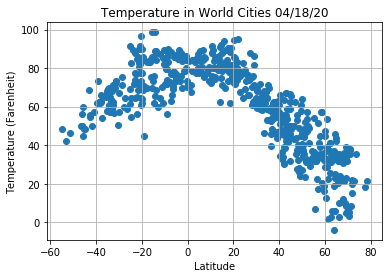

In [10]:
# Build a scatter plot for each data type 
#Graph 1: Temperature vs Latitude 
plt.scatter(weather_data["Latitude"], weather_data["Temperature (F)"], marker="o")
date_graph = time.strftime("%m/%d/%y")

# Incorporate the other graph properties
plt.title(f"Temperature in World Cities {date_graph}")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

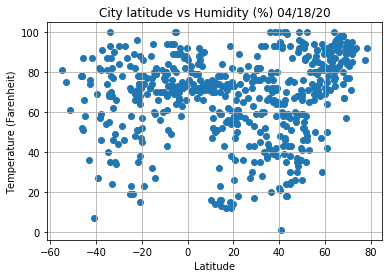

In [11]:
#Graph 2: Humidity vs Latitude 
plt.scatter(weather_data["Latitude"],weather_data["Humidity (%)"], marker="o")
date_graph = time.strftime("%m/%d/%y")

# Incorporate the other graph properties
plt.title(f"City latitude vs Humidity (%) {date_graph}")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)

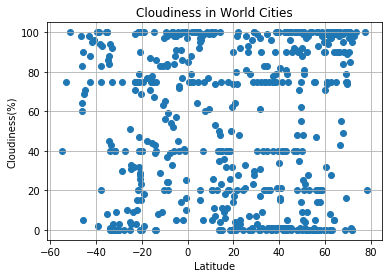

In [29]:
#Graph 3: Cloudiness(%) vs Latitude
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness (%)"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

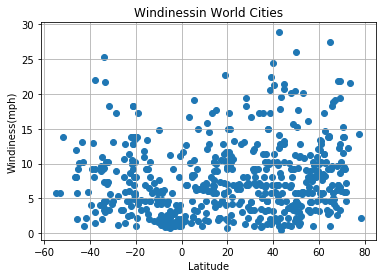

In [30]:
#Graph 4: Windspeed(mph) vs Latitude
plt.scatter(weather_data["Latitude"], weather_data["Windiness(mph)"], marker="o")

# Incorporate the other graph properties
plt.title("Windinessin World Cities")
plt.ylabel("Windiness(mph)")
plt.xlabel("Latitude")
plt.grid(True)

In [31]:
#save dataframe to csv file 
weather_data.to_csv("weather_data.csv")

In [38]:
weather_data

,City,Country,Date,Latitude,Longitutde,Temperature (F),Humidity (%),Cloudiness (%),Windiness(mph)
0,Ushuaia,AR,1587268199,-54.80,-68.30,48.20,81,40,5.82
1,General Roca,AR,1587268478,-39.03,-67.58,73.40,27,2,9.17
2,Faanui,PF,1587268358,-16.48,-151.75,83.12,72,71,11.77
3,Rikitea,PF,1587268478,-23.12,-134.97,77.45,69,71,7.36
4,Jamestown,US,1587268244,42.10,-79.24,39.16,64,1,6.93
...,...,...,...,...,...,...,...,...,...
544,Nevşehir,TR,1587268573,38.92,34.67,46.90,38,21,1.39
545,Aligoodarz,IR,1587268573,33.40,49.69,46.33,40,83,1.81
546,Diapaga,BF,1587268573,12.07,1.79,85.01,50,74,12.77
547,Lavrentiya,RU,1587268573,65.58,-171.00,20.55,96,100,9.66


In [47]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_data.loc[weather_data["Latitude"] > 0]
southern_df = weather_data.loc[weather_data["Latitude"] < 0]

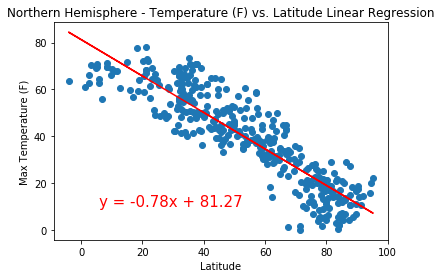

In [61]:
#Northern Hemisphere - Temperature (F) vs. Latitude
x_values = northern_df["Temperature (F)"]
y_values = northern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Temperature (F) vs. Latitude Linear Regression')
plt.savefig('Northern Hemisphere - Temperature (F) vs. Latitude Linear Regression.png')

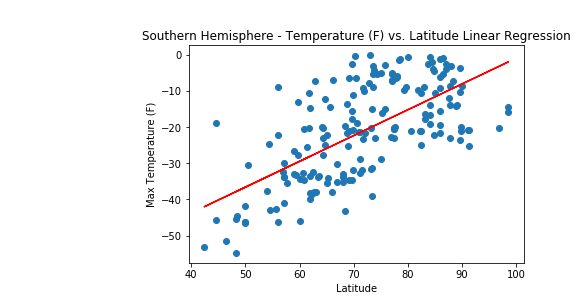

In [62]:
#Southern Hemisphere - Temperature (F) vs. Latitude
x_values = southern_df["Temperature (F)"]
y_values = southern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Temperature (F) vs. Latitude Linear Regression')
plt.savefig('Southern Hemisphere - Temperature (F) vs. Latitude Linear Regression.png')

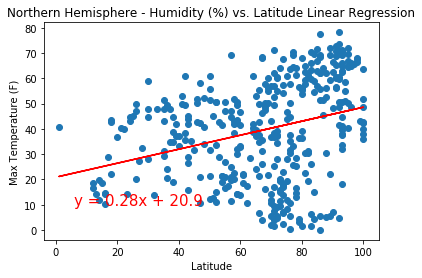

In [63]:
#Northern Hemisphere - Humidity (%) vs. Latitude 
x_values = northern_df["Humidity (%)"]
y_values = northern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.savefig('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png')

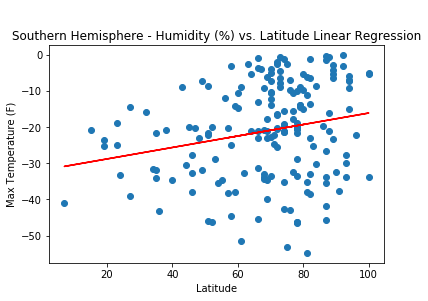

In [64]:
#Southern Hemisphere - Humidity (%) vs. Latitude 
x_values = southern_df["Humidity (%)"]
y_values = southern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.savefig('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png')

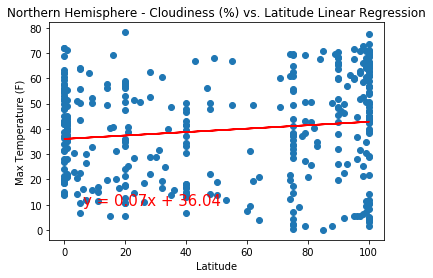

In [65]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude
x_values = northern_df["Cloudiness (%)"]
y_values = northern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.savefig('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png')

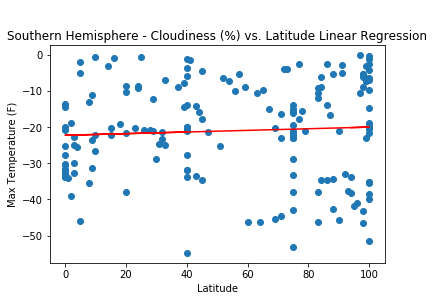

In [67]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude 
x_values = southern_df["Cloudiness (%)"]
y_values = southern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.savefig('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png')

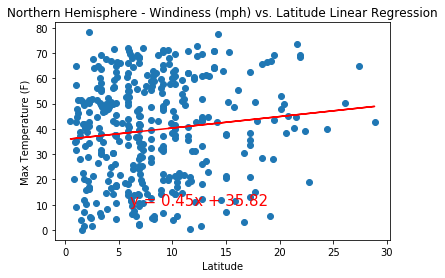

In [68]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude 
x_values = northern_df["Windiness(mph)"]
y_values = northern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Windiness (mph) vs. Latitude Linear Regression')
plt.savefig('Northern Hemisphere - Windiness (mph) vs. Latitude Linear Regression.png')


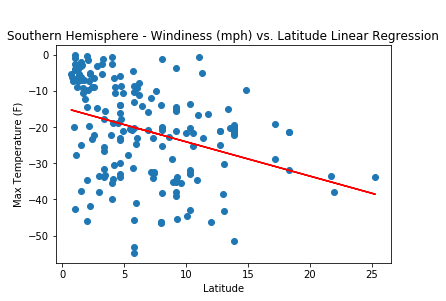

In [60]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude 
x_values = southern_df["Windiness(mph)"]
y_values = southern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Windiness (mph) vs. Latitude Linear Regression')
plt.savefig("Southern Hemisphere - Windiness (mph) vs. Latitude Linear Regression.png")